# Predicting Stress from Social Media Posts using Various Models

• Cleaned and vectorized _post data_ using **TF-IDF** to represent semantic content  
• Trained several classifiers to detect stress-related posts  
• Achieved **81% accuracy** and F1-score on test data, using classification metrics and confusion matrix  
• Visualized **time-based trends** and ***stress-related keywords*** to interpret model behavior

## Load Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import chardet

In [2]:
pd.set_option('display.max_colwidth', None)

## Load the Data

In [6]:
data = pd.read_excel(r"MonkeyPox Tweets.xlsx", sheet_name='Hindi')
data.head()

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate,Stress or Anxiety
0,CgdyfA1sht2,#DNA : कोरोना के रास्ते पर 'मंकी पॉक्स'? \n\n#Monkeypox,07/25/2022,Hindi,#DNA: &#39;Monkeypox&#39; on the way to Corona? #Monkeypox,neutral,Not Hate,No Stress/Anxiety Detected
1,CghtjepP2tw,मंकीपॉक्स के 78 देशों में अब तक 18000 मामले मिले\n.\n.\n.\n.\n#monkeypox #ubtnews #ubthealth #monkeypoxvirus,07/27/2022,Hindi,So far 18000 cases of monkeypox have been found in 78 countries. . . . #monkeypox #ubtnews #ubthealth #monkeypoxvirus,neutral,Not Hate,No Stress/Anxiety Detected
2,CghfgMJI_Fd,"क्या है #मंकीपॉक्स ? \nमंकीपॉक्स के क्या हैं कारण, लक्षण, और कैसे करें बचाव ?\n""मंकीपॉक्स क्या और तैयारियां"" विषय पर जानकारी प्राप्त करने के लिए देखिए कल सायंकाल 04 बजे स्वास्थ्य संबंधित कार्यक्रम ""सेहत आपकी""। सजीव प्रसारण सिर्फ #डीडी_यूपी पर और https://youtu.be/uGl78w6Lo1I\n#monkeypox",07/27/2022,Hindi,"What is #Monkeypox? What are the causes, symptoms and prevention of monkeypox? To get information on &quot;What is Monkeypox and preparations&quot;, watch the health related program &quot;Sehat Aapki&quot; tomorrow at 4 pm. Live telecast only on #DD_UP and https://youtu.be/uGl78w6Lo1I #monkeypox",neutral,Not Hate,No Stress/Anxiety Detected
3,CghfkcMppMg,देश में मंकीपॉक्स के लगातार बढ़ते मामलों को देखते हुए सरकार सतर्क हो गई है। सरकार ने मंकीपॉक्स की वैक्सीन निर्माण के लिए 'एक्सप्रेशन ऑफ इंटरेस्य' यानि टेंडर निकाला है। इसके अलावा मंकीपॉक्स की जांच के लिए टेस्टिंग किट का भी टेंडर निकाला गया है। वैक्सीन और टेस्टिंग किट प्राइवेट-पब्लिक पार्टनरशिप मोड से बनाई जाएगी। सरकार की तरफ से जारी नोटिफिकेशन के मुताबिक 10 अगस्त तक कंपनियां ईओआई जमा कर सकती हैं। अब तक देश में मंकीपॉक्स के चार केस मिल चुके हैं। इनमें से तीन केरल में और एक दिल्ली में है। दिल्ली में पाया गया मंकीपॉक्स का पहला मरीज एलएनजेपी अस्पताल में भर्ती है। रिपोर्ट्स के मुताबिक वह ठीक हो रहा है।\n\n#monkeypox #virus #tender #desh #company #keral #india #wfb,07/27/2022,Hindi,"In view of the ever increasing cases of monkeypox in the country, the government has become alert. The government has issued a tender for &#39;Expression of Interest&#39; for the manufacture of monkeypox vaccine. Apart from this, a tender has also been issued for testing kits for monkeypox. Vaccine and testing kits will be made in private-public partnership mode. According to the notification issued by the government, companies can submit EOI till August 10. So far, four cases of monkeypox have been found in the country. Of these, three are in Kerala and one in Delhi. The first patient of monkeypox found in Delhi is admitted in LNJP Hospital. According to reports, he is recovering. #monkeypox #virus #tender #desh #company #keral #india #wfb",fear,Not Hate,Stress/Anxiety Detected
4,CgheaoDp3Pq,"दुनिया भर में मंकीपॉक्स (Monkeypox) के बढ़ते केसों और विश्व स्वास्थ्य संगठन (WHO) से इसे वैश्विक स्वास्थ्य आपातकाल (Global Health Emergency) घोषित करने के बाद लोगों की चिंताएं भी बढ़ती जा रही हैं। हालांकि स्वास्थ्य विशेषज्ञों और शोधकर्ताओं ने लोगों से इसको लेकर सतर्कता बरतने और इस प्रकोप को वर्जित नहीं मानने की अपील की है, लेकिन अभी तक यह साफ हो सका है कि कोई एसिम्प्टोमैटिक व्यक्ति वायरस को फैला सकता है या नहीं।...delhilookout.com\n#monkeypox #who #worldhealthorganization #healthemergency #delhilookoutv",07/27/2022,Hindi,"With the increasing cases of monkeypox across the world and the World Health Organization (WHO) declaring it a global health emergency, people&#39;s concerns are also increasing. Although health experts and researchers have appealed to people to be cautious about it and not consider this outbreak as taboo, it is not yet clear whether an asymptomatic person can spread the virus or not. ...delhilookout.com #monkeypox #who #worldhealthorganization #healthemergency #delhilookoutv",fear,Not Hate,Stress/Anxiety Detected


## EDA

#### Quick check for missing data

In [8]:
# missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Post ID                      610 non-null    object
 1   Post description             610 non-null    object
 2   Date                         610 non-null    object
 3   Language                     610 non-null    object
 4   Translated Post Description  610 non-null    object
 5   Sentiment                    610 non-null    object
 6   Hate                         610 non-null    object
 7   Stress or Anxiety            610 non-null    object
dtypes: object(8)
memory usage: 38.3+ KB


#### Overall Statistical Summary of columns

In [10]:
data.describe()

,Post ID,Post description,Date,Language,Translated Post Description,Sentiment,Hate,Stress or Anxiety
count,610,610,610,610,610,610,610,610
unique,610,565,90,1,553,7,2,2
top,CgdyfA1sht2,"मंकीपॉक्स से बचाव आसान है, लक्षणों की समय रहते पहचान और सही इलाज ही समाधान है। \nअधिक जानकारी के लिए https://main.mohfw.gov.in/diseasealerts-0 पर जाएं।\n#Monkeypox",07/27/2022,Hindi,Follow all the guidelines and stay safe from monkeypox. For more information visit main.mohfw.gov.in/diseasealerts-0 #Monkeypox,fear,Not Hate,No Stress/Anxiety Detected
freq,1,5,57,610,5,264,609,346


#### Original Sentiment Distribution

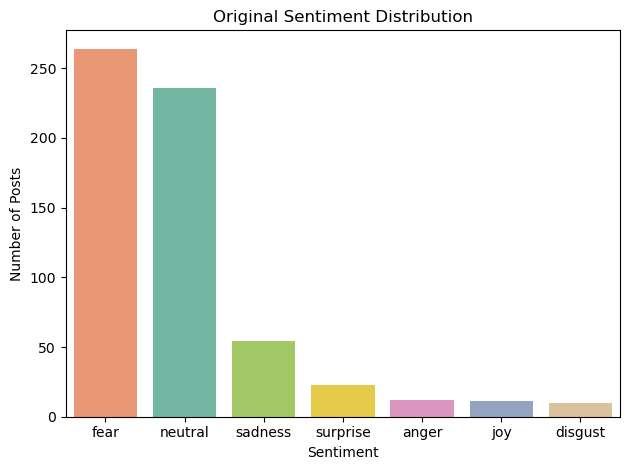

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Sentiment', hue="Sentiment", order=data['Sentiment'].value_counts().index, palette='Set2')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


#### Class Balance Check

Stress or Anxiety
No Stress/Anxiety Detected    346
Stress/Anxiety Detected       264
Name: count, dtype: int64


<Axes: xlabel='Stress or Anxiety'>

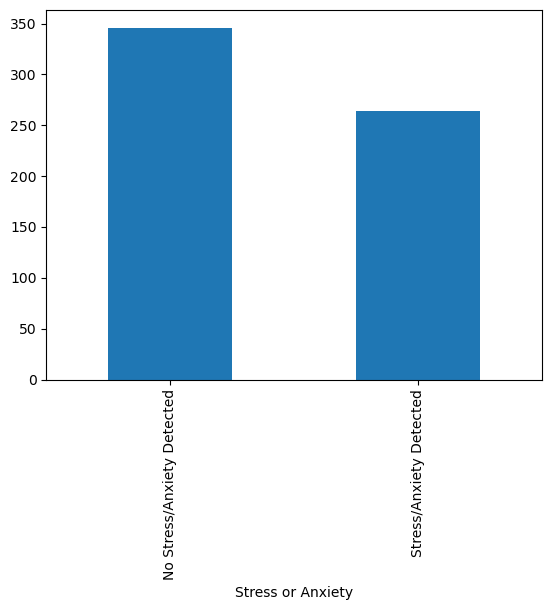

In [26]:
print(data['Stress or Anxiety'].value_counts())
data['Stress or Anxiety'].value_counts().plot(kind='bar')

In [43]:
data[['Translated Post Description', 'Sentiment', 'Stress or Anxiety']].head()

,Translated Post Description,Sentiment,Stress or Anxiety
0,#DNA: &#39;Monkeypox&#39; on the way to Corona? #Monkeypox,neutral,No Stress/Anxiety Detected
1,So far 18000 cases of monkeypox have been found in 78 countries. . . . #monkeypox #ubtnews #ubthealth #monkeypoxvirus,neutral,No Stress/Anxiety Detected
2,"What is #Monkeypox? What are the causes, symptoms and prevention of monkeypox? To get information on &quot;What is Monkeypox and preparations&quot;, watch the health related program &quot;Sehat Aapki&quot; tomorrow at 4 pm. Live telecast only on #DD_UP and https://youtu.be/uGl78w6Lo1I #monkeypox",neutral,No Stress/Anxiety Detected
3,"In view of the ever increasing cases of monkeypox in the country, the government has become alert. The government has issued a tender for &#39;Expression of Interest&#39; for the manufacture of monkeypox vaccine. Apart from this, a tender has also been issued for testing kits for monkeypox. Vaccine and testing kits will be made in private-public partnership mode. According to the notification issued by the government, companies can submit EOI till August 10. So far, four cases of monkeypox have been found in the country. Of these, three are in Kerala and one in Delhi. The first patient of monkeypox found in Delhi is admitted in LNJP Hospital. According to reports, he is recovering. #monkeypox #virus #tender #desh #company #keral #india #wfb",fear,Stress/Anxiety Detected
4,"With the increasing cases of monkeypox across the world and the World Health Organization (WHO) declaring it a global health emergency, people&#39;s concerns are also increasing. Although health experts and researchers have appealed to people to be cautious about it and not consider this outbreak as taboo, it is not yet clear whether an asymptomatic person can spread the virus or not. ...delhilookout.com #monkeypox #who #worldhealthorganization #healthemergency #delhilookoutv",fear,Stress/Anxiety Detected


## Text Preprocessing using NLTK
 - URLs, hashtags and any special characters are removed here
 - Each post is then tokenized and lemmatized

In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

wnl = WordNetLemmatizer()

def text_cleaner(txt):
    txt = re.sub(r'http\S+|www\S+', ' ', txt)
    txt = re.sub(r'[^A-Za-z0-9\s]', ' ', txt)
    tokens = word_tokenize(txt)
    lemmtokens = [wnl.lemmatize(w) for w in tokens]
    
    return " ".join(lemmtokens)

data['Cleaned Post Description'] = data['Translated Post Description'].apply(text_cleaner)

In [14]:
data[['Cleaned Post Description', 'Sentiment', 'Stress or Anxiety']].head()

,Cleaned Post Description,Sentiment,Stress or Anxiety
0,DNA 39 Monkeypox 39 on the way to Corona Monkeypox,neutral,No Stress/Anxiety Detected
1,So far 18000 case of monkeypox have been found in 78 country monkeypox ubtnews ubthealth monkeypoxvirus,neutral,No Stress/Anxiety Detected
2,What is Monkeypox What are the cause symptom and prevention of monkeypox To get information on quot What is Monkeypox and preparation quot watch the health related program quot Sehat Aapki quot tomorrow at 4 pm Live telecast only on DD UP and monkeypox,neutral,No Stress/Anxiety Detected
3,In view of the ever increasing case of monkeypox in the country the government ha become alert The government ha issued a tender for 39 Expression of Interest 39 for the manufacture of monkeypox vaccine Apart from this a tender ha also been issued for testing kit for monkeypox Vaccine and testing kit will be made in private public partnership mode According to the notification issued by the government company can submit EOI till August 10 So far four case of monkeypox have been found in the country Of these three are in Kerala and one in Delhi The first patient of monkeypox found in Delhi is admitted in LNJP Hospital According to report he is recovering monkeypox virus tender desh company keral india wfb,fear,Stress/Anxiety Detected
4,With the increasing case of monkeypox across the world and the World Health Organization WHO declaring it a global health emergency people 39 s concern are also increasing Although health expert and researcher have appealed to people to be cautious about it and not consider this outbreak a taboo it is not yet clear whether an asymptomatic person can spread the virus or not delhilookout com monkeypox who worldhealthorganization healthemergency delhilookoutv,fear,Stress/Anxiety Detected


## Label Encoding for Stress/Anxiety column

The target column is categorical, so it is encoded into numerical format for easier classification.

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["target"] = le.fit_transform(data["Stress or Anxiety"])

## Split into train & test (80-20)
Data is split into training and test sets, with test set being 20% of the dataset.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["Cleaned Post Description"], data["target"], test_size=0.2, random_state=42)

## TF-IDF Vectorization

TF-IDF is preferred over CountVectorizer to give importance to keywords and disregard stopwords, that are naturally abundant in the text. 
The log factor in TF-IDF works to penalize very high and very few occurences of words, as these words are considered statistically insignificant and do not contribute to pattern detection.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', lowercase=True, max_features=5000, ngram_range=(1, 2))
#X_train_vec = tfidf.fit_transform(X_train)
#X_test_vec = tfidf.transform(X_test)

### SelectKBest for top20 words

The chi-squared test is used to score how strongly each feature is associated with the target class. The top 20 words that have the strongest association with each target are then displayed.

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

# Select top 20 words that are most related to target
selector = SelectKBest(score_func=chi2, k=20)
selector.fit(X_train_vec, y_train)

top_indices = selector.get_support(indices=True)
top_words = [tfidf.get_feature_names_out()[i] for i in top_indices]
print("Top predictive words:", top_words)

Top predictive words: ['alert', 'avoid monkeypox', 'declared', 'declared monkeypox', 'emergency', 'follow guideline', 'global', 'global health', 'health', 'health emergency', 'health organization', 'increasing', 'infection information', 'information', 'information visit', 'organization', 'prevent monkeypox', 'visit', 'world', 'world health']


### GridSearchCV to find best C

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'clf__C': [0.1, 1, 10, 50],
    'tfidf__ngram_range': [(1,1), (1,2)],
}

grid = GridSearchCV(lr_pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

y_pred_lr_tuned = grid.predict(X_test)

print("Test Accuracy (Tuned LogReg):", accuracy_score(y_test, y_pred_lr_tuned))

Best Params: {'clf__C': 10, 'tfidf__ngram_range': (1, 1)}
Best CV Score: 0.8116137176520091
Test Accuracy (Tuned LogReg): 0.7786885245901639


In [32]:
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__loss': ['hinge', 'squared_hinge']
}

grid = GridSearchCV(
    svc_pipe,
    param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1            # use all cores
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

y_pred_svc_tuned = grid.predict(X_test)

print("Test Accuracy (Tuned SVC):", accuracy_score(y_test, y_pred_svc_tuned))


Best Params: {'clf__C': 10, 'clf__loss': 'squared_hinge'}
Best CV Score: 0.8054491899852725
Test Accuracy (Tuned SVC): 0.819672131147541


## Model Pipelines
 Several models have been trained to compare their performance:
  - Logistic Regression tuned with GridSearchCV
  - Multinomial Naive Bayes 
  - Complement Naive Bayes (better suited for imbalanced classes)
  - Linear SVC

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

lr_pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression(max_iter=1000, C=10))
])

mb_pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', MultinomialNB())
])

cb_pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', ComplementNB())
])

svc_pipe = Pipeline([
    ('tfidf', tfidf),
    ('clf', LinearSVC(dual=True, C=10))
])

In [36]:
lr_pipe.fit(X_train, y_train)
mb_pipe.fit(X_train, y_train)
cb_pipe.fit(X_train, y_train)
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LinearSVC(C=10, dual=True))])

In [38]:
y_pred_lr = lr_pipe.predict(X_test)
y_pred_mb = mb_pipe.predict(X_test)
y_pred_cb = cb_pipe.predict(X_test)
y_pred_svc = svc_pipe.predict(X_test)

## Model Evaluation
-------------------------------------

In [50]:
from sklearn.metrics import accuracy_score

print("LogRegression Accuracy:   ", accuracy_score(y_test, y_pred_lr))
print("Multinomial NB Accuracy:  ", accuracy_score(y_test, y_pred_mb))
print("Complement NB Accuracy:   ", accuracy_score(y_test, y_pred_cb))
print("Linear SVC Accuracy:      ", accuracy_score(y_test, y_pred_svc))

LogRegression Accuracy:    0.7786885245901639
Multinomial NB Accuracy:   0.7868852459016393
Complement NB Accuracy:    0.7540983606557377
Linear SVC Accuracy:       0.819672131147541


### Side by Side Comparison

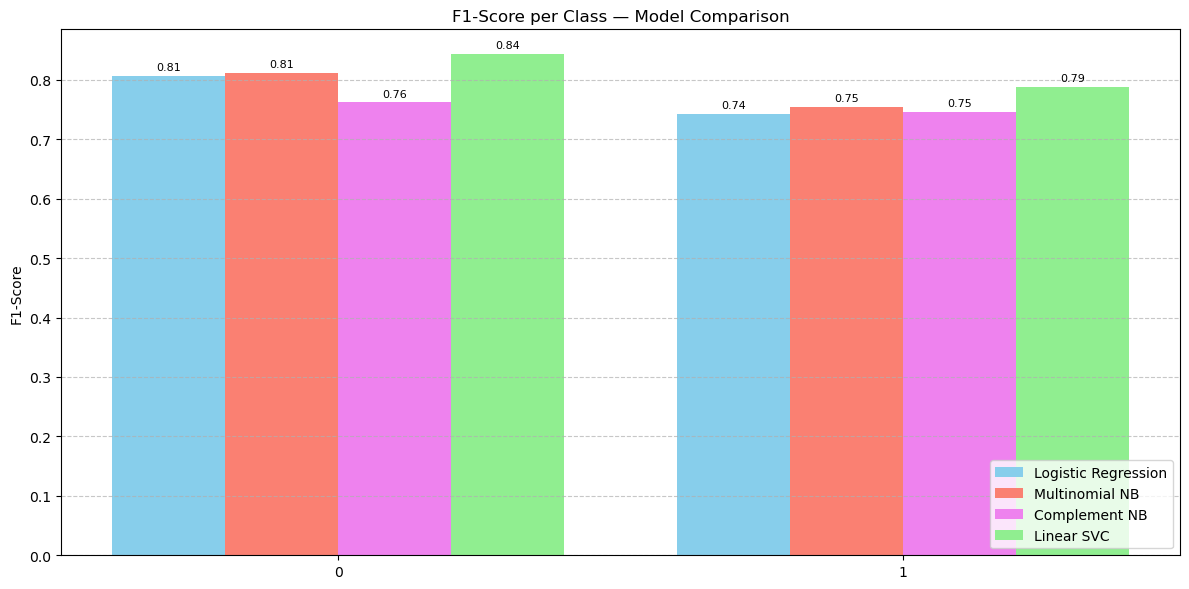

In [56]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_lr = f1_score(y_test, y_pred_lr, average=None)
f1_mb = f1_score(y_test, y_pred_mb, average=None)
f1_cb = f1_score(y_test, y_pred_cb, average=None)
f1_svc = f1_score(y_test, y_pred_svc, average=None)

labels = sorted(set(y_test))

x = range(len(labels))
width = 0.2 

plt.figure(figsize=(12, 6))

plt.bar([i - 1.5 * width for i in x], f1_lr, width=width, label='Logistic Regression', color='skyblue')
plt.bar([i - 0.5 * width for i in x], f1_mb, width=width, label='Multinomial NB', color='salmon')
plt.bar([i + 0.5 * width for i in x], f1_cb, width=width, label='Complement NB', color='violet')
plt.bar([i + 1.5 * width for i in x], f1_svc, width=width, label='Linear SVC', color='lightgreen')

#value labels
for idx, scores in zip([-1.5, -0.5, 0.5, 1.5], [f1_lr, f1_mb, f1_cb, f1_svc]):
    for i, score in zip(x, scores):
        plt.text(i + idx * width, score + 0.01, f"{score:.2f}", ha='center', fontsize=8)

plt.xticks(x, labels)
plt.ylabel('F1-Score')
plt.title('F1-Score per Class — Model Comparison')
plt.legend(loc=4) #lower right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

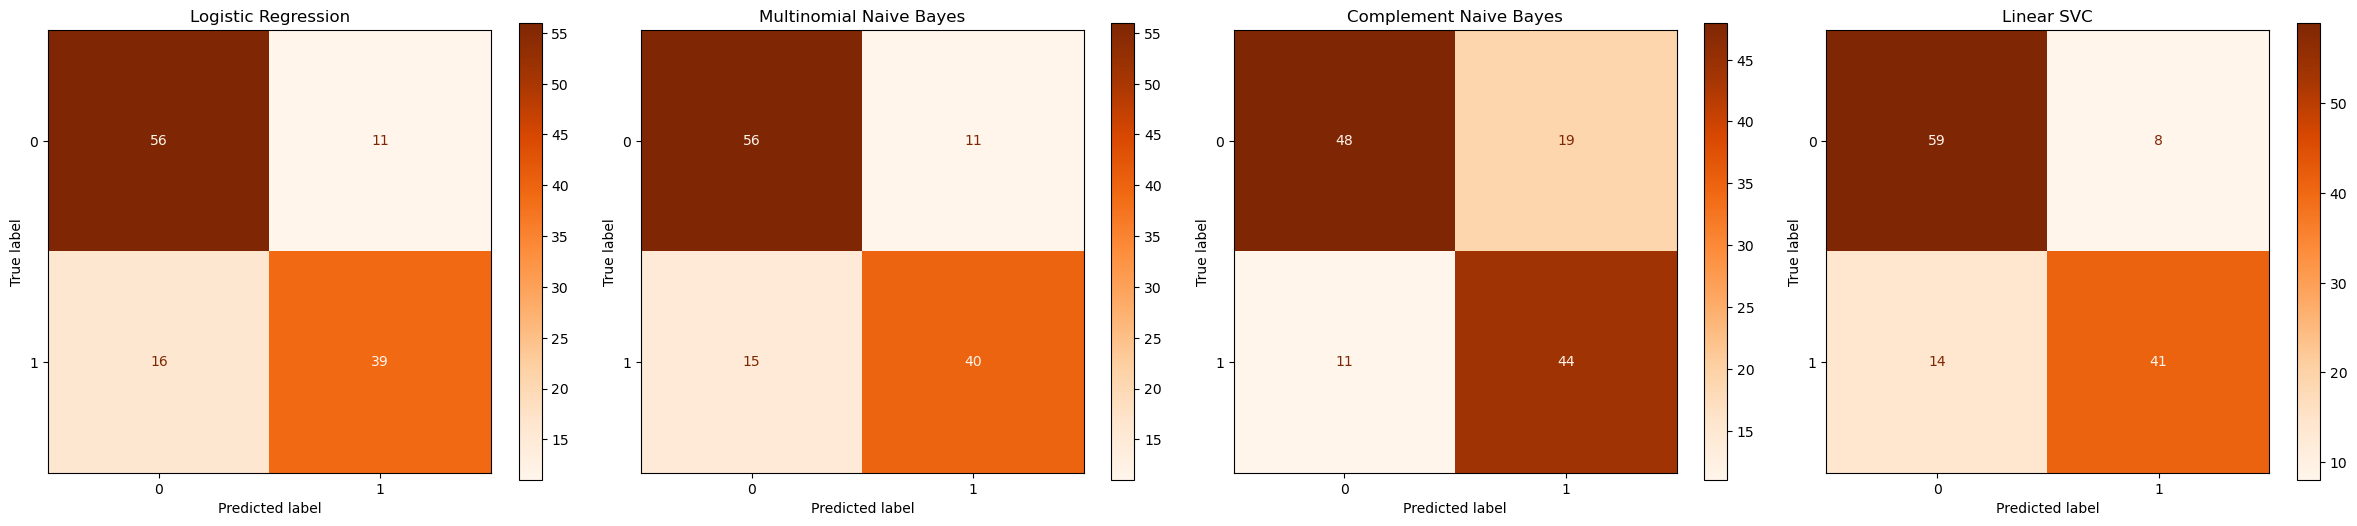

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], cmap='Oranges')
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mb, ax=axes[1], cmap='Oranges')
axes[1].set_title('Multinomial Naive Bayes')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cb, ax=axes[2], cmap='Oranges')
axes[2].set_title('Complement Naive Bayes')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, ax=axes[3], cmap='Oranges')
axes[3].set_title('Linear SVC')

plt.tight_layout()
plt.show()


In [72]:
import random
# Create a DataFrame to compare predictions with actual labels
svc_errors = pd.DataFrame({
    'Text': X_test,
    'True Label': y_test,
    'Predicted Label': y_pred_svc
})

# Filter rows where prediction is incorrect
svc_misclassified = svc_errors[svc_errors['True Label'] != svc_errors['Predicted Label']]

svc_misclassified[['Text']].head()

,Text
394,MonkeyPox No evidence of sexual contact found in Delhi patient suffering from fear stigma anxiety stress MonkeyPox MonkeyPoxSymptoms MonkeyPoxCases
320,National International The threat of corona and monkeypox wa not yet over when a new virus ha been found in China According to Taiwan Center for Disease Control zoonotic langya virus ha been found in China So far about 35 people have been found infected with this virus According to medium report Taiwan will start nucleic acid testing method to identify this virus and monitor the infection This virus ha been found in Shandong and Henan province of China According to Taipei Times this virus can spread from animal to human Taiwan 39 s CDC Deputy Director General Chuang Jen Hsiang informed on Sunday that the study ha revealed that the virus is not spreading from human to human right now but he also said that it can not be said that this virus can not spread from human to human He ha asked people to be cautious until more information about the virus is available zoonoticlangya china virus world internationalnews monkeypox who unicef medical testing
546,In India Billu came before the election not to drink tea but to serve tea Now the time ha come to clean up Billu 39 s tea drinker Keep identifying the leader administration channel employee who call monkeypox dangerous or an epidemic he ha to be treated you know right
227,The Kerala government confirmed the first death from monkeypox in the country The government said that the 22 year old man who died on July 30 wa infected with monkeypox Thus this is the first death from monkeypox in the country State Chief Minister Pinarayi Vijayan said that sample sent to the National Institute of Virology NIV Pune found the infection and it wa the West African variant kerala state 1stmonkeypoxdeath monkeypox disease cm chiefminister pinnarivijayan virus threat newslive newsoftheday newslive newspot hindisamachar instagram instanews therealtalkin
176,First death due to monkeypox registered in India 22 year old man had returned to Kerala from UAE kerla monkeypox died


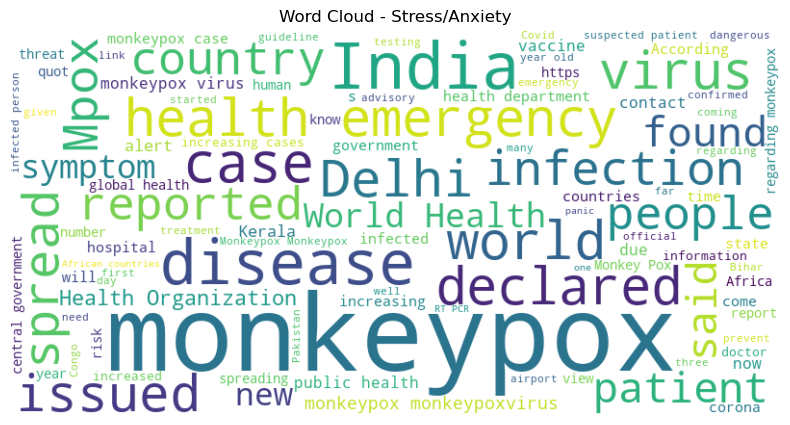

In [39]:
from wordcloud import WordCloud

# Word cloud for stress-related posts
stress_text = " ".join(df[df["Stress or Anxiety"] == "Stress/Anxiety Detected"]["Translated Post Description"])

for label, text in [("Stress/Anxiety", stress_text)]:
    wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {label}")
    plt.show()


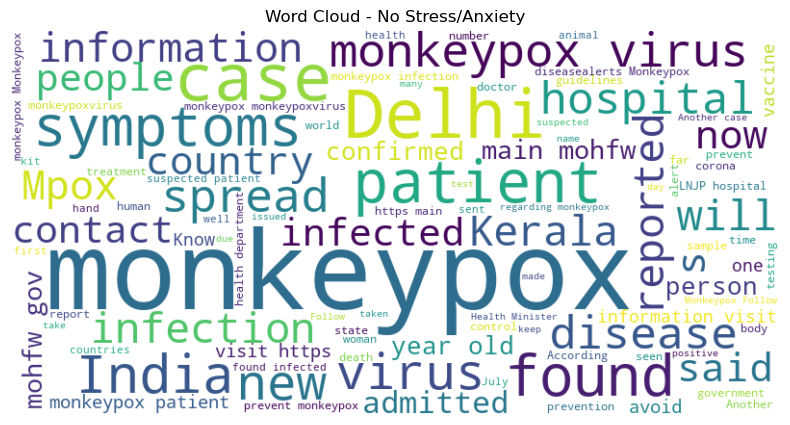

In [56]:
from wordcloud import WordCloud

# Word cloud for stress-related posts
stress_text = " ".join(data[data["Stress or Anxiety"] == "No Stress/Anxiety Detected"]["Translated Post Description"])

# Generate WordCloud
for label, text in [("No Stress/Anxiety", stress_text)]:
    wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {label}")
    plt.show()


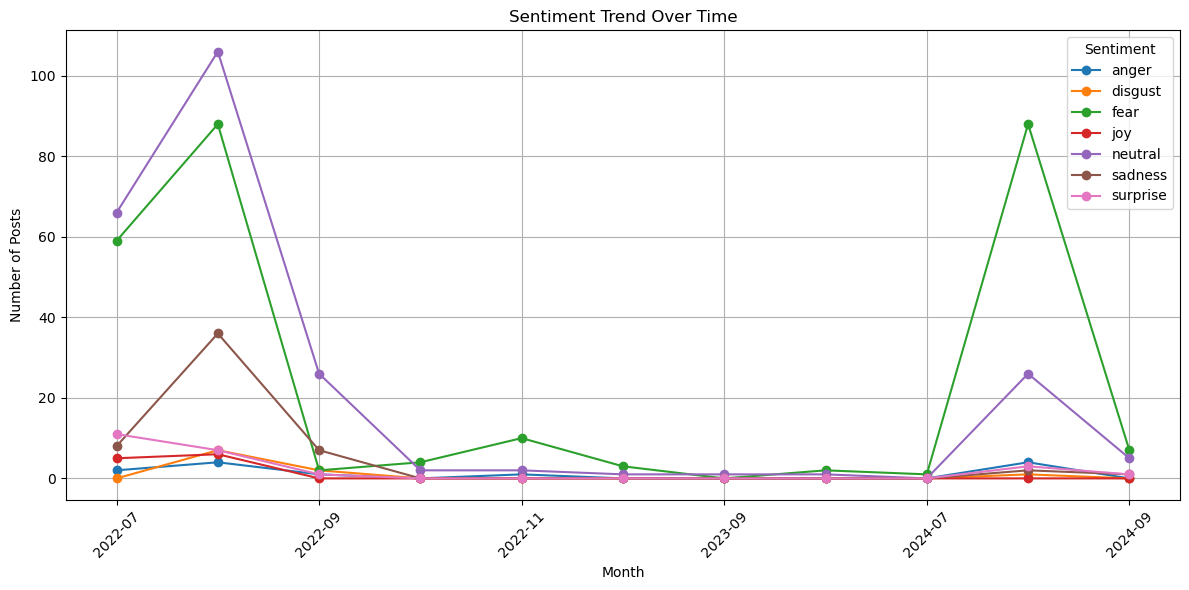

In [40]:
# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Group by date and sentiment
trend = df.groupby([df["Date"].dt.to_period("M"), "Sentiment"]).size().unstack(fill_value=0)

trend.index = trend.index.astype(str)
trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Sentiment Trend Over Time")
plt.ylabel("Number of Posts")
plt.xlabel("Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
